In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from libraries.graphs import graph_draw
from G_matrix import G
from GforK_matrix import GforK 
from Gk_matrix import Gk
from K1_operator import K1

In [3]:
output_dir = "graphs"  # create a directory to save the plots
os.makedirs(output_dir, exist_ok=True)
if not os.path.exists("data"):  # create the data directory if it does not exist
    os.makedirs("data")

## 1. From healthy G and K, compute diseased G by K*G and K@K 

In [4]:
# here I suppose to have G and K, simple model, only one matrix 4x4 for the entire brain, I use the same function to 
# generate both matrices 
print(K1)
print("\n")
print(G)

plt.figure(1)
graph_draw(np.round(G, 2),
        Directed=False,
        Weighted=True,
        Index_on=True,
        Weight_on=False
        )
plt.title("healthy_G")
plt.savefig(os.path.join(output_dir, f"{"healthy_G"}.png"))
plt.close()

np.savetxt(os.path.join("data", "K1.txt"), K1)
np.savetxt(os.path.join("data", "G.txt"), G)

[[0.6  0.4  0.04 0.54]
 [0.04 0.49 0.96 0.56]
 [0.6  0.88 0.16 0.41]
 [0.06 0.   0.32 0.38]]


[[1.   0.34 0.62 0.58]
 [0.69 1.   0.42 0.12]
 [0.71 0.38 1.   0.47]
 [0.13 0.31 0.63 1.  ]]


In [5]:
K1G = K1 * G # elementwise product to compute K 
K1_at_G = K1 @ G # matrix product to compute K 

np.savetxt(os.path.join("data", "K1G.txt"), K1G)
np.savetxt(os.path.join("data", "K1_at_G.txt"), K1_at_G)
# to check whether the two operations in python (@ and np.matmul) are really the same
# G_at_K1_2 = np.matmul(G, K1)
# print(GK1)
# print(G_at_K1_1)
# print(G_at_K1_2)
# print(G_at_K1_1 == G_at_K1_2)

plt.figure(2)
graph_draw(np.round(K1G, 2),
        Directed=False,
        Weighted=True,
        Index_on=True,
        Weight_on=False
        )
plt.title("elementw_KG")
plt.savefig(os.path.join(output_dir, f"{"elementw_KG"}.png"))
plt.close()

plt.figure(3)
graph_draw(np.round(K1_at_G, 2),
        Directed=False,
        Weighted=True,
        Index_on=True,
        Weight_on=False
        )
plt.title("rowbycol_KG")
plt.savefig(os.path.join(output_dir, f"{"rowbycol_KG"}.png"))
plt.close()

In [6]:
with open('eigenvalues_and_eigenvectors.txt', 'w') as f:
    # ELEMENTWISE
    
    eigenval_K1G, eigenvec_K1G = np.linalg.eig(K1G)
    f.write(f"Eigenvalues {"elementw_KG"}:\n")
    f.write(np.array2string(eigenval_K1G, separator=', ') + '\n\n')
    f.write(f"Eigenvectors {"elementw_KG"}:\n")
    f.write(np.array2string(eigenvec_K1G, separator=', ') + '\n\n')
    
    # ROW-COLUMN PRODUCT

    eigenval_K1_at_G_1, eigenvec_K1_at_G_1 = np.linalg.eig(K1_at_G)
    f.write(f"Eigenvalues {"rowbycol_KG"}:\n")
    f.write(np.array2string(eigenval_K1_at_G_1, separator=', ') + '\n\n')
    f.write(f"Eigenvectors {"rowbycol_KG"}:\n")
    f.write(np.array2string(eigenvec_K1_at_G_1, separator=', ') + '\n\n')

## 2. From G and KG, compute K by KG * $G^{-1}$ and KG @ $G^{-1}$ and 

In [7]:
# here I suppose to have G and G^k, I suppone before we had a matrix multiplication
print(GforK)
print("\n")
print(Gk)
np.savetxt(os.path.join("data", "GforK.txt"), GforK)
np.savetxt(os.path.join("data", "Gk.txt"), Gk)

plt.figure(4)
graph_draw(np.round(GforK, 2),
        Directed=False,
        Weighted=True,
        Index_on=True,
        Weight_on=False
        )
plt.title("healthy_G_forK")
plt.savefig(os.path.join(output_dir, f"{"healthy_G_forK"}.png"))
plt.close()

[[1.   0.64 0.41 0.58]
 [0.43 1.   0.29 0.67]
 [0.53 0.61 1.   0.77]
 [0.45 0.54 0.11 1.  ]]


[[1.   0.86 0.24 0.62]
 [0.6  1.   0.64 0.96]
 [0.9  0.31 1.   0.88]
 [0.92 0.05 0.2  1.  ]]


In [8]:
G_1 = np.linalg.inv(GforK)  # compute the inverse of a the healthy brain's matrix
print(G_1)

np.savetxt(os.path.join("data", "G_1.txt"), G_1)

plt.figure(5)
graph_draw(np.round(G_1, 2),
        Directed=False,
        Weighted=True,
        Index_on=True,
        Weight_on=False
        )
plt.title("inverse_G_forK")
plt.savefig(os.path.join(output_dir, f"{"inverse_G_forK"}.png"))
plt.close()

[[ 1.57933342 -0.67552504 -0.43772442 -0.1263638 ]
 [-0.22700739  1.78540981 -0.33605833 -0.80579538]
 [-0.26846154 -0.24338221  1.25159506 -0.64495442]
 [-0.55858528 -0.63336299  0.24077203  1.5629382 ]]


In [9]:
# computation of K operator in two ways 
K_matmul = Gk @ G_1 
print(K_matmul)
K_elementw = Gk * G_1

np.savetxt(os.path.join("data", "K_matmul.txt"), K_matmul)
np.savetxt(os.path.join("data", "K_elementw.txt"), K_elementw)
# computation of eigenvalues and eigenvectors of the two K obtained in two different ways 
with open('K_matrices_eigenval_eigenvec.txt', 'w') as f:
    # save the matrices 
    f.write("Matrix (K_matmul):\n")
    f.write(np.array2string(K_matmul, separator=', ') + '\n\n')
    f.write("Matrix (K_elementw):\n")
    f.write(np.array2string(K_elementw, separator=', ') + '\n\n')

    # ELEMENTWISE
    eigenval_K_elementw, eigenvec_K_elementw = np.linalg.eig(K_elementw)
    f.write(f"Eigenvalues {"elementw_K"}:\n")
    f.write(np.array2string(eigenval_K_elementw, separator=', ') + '\n\n')
    f.write(f"Eigenvectors {"elementw_K"}:\n")
    f.write(np.array2string(eigenvec_K_elementw, separator=', ') + '\n\n')
    
    # ROW-COLUMN PRODUCT

    eigenval_K_matmul, eigenvec_K_matmul = np.linalg.eig(K_matmul)
    f.write(f"Eigenvalues {"rowbycol_K"}:\n")
    f.write(np.array2string(eigenval_K_matmul, separator=', ') + '\n\n')
    f.write(f"Eigenvectors {"rowbycol_K"}:\n")
    f.write(np.array2string(eigenvec_K_matmul, separator=', ') + '\n\n')


[[ 0.97335343  0.40883061 -0.27707311 -0.0051152 ]
 [ 0.01253541  0.6163017   0.43346901  0.20603619]
 [ 0.5910112  -0.85523714  0.96534438  0.36690721]
 [ 0.82935879 -1.21425197  0.07158166  1.27740285]]


<Figure size 2000x1500 with 0 Axes>

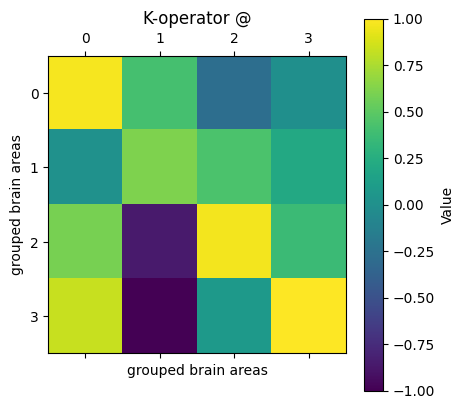

<Figure size 2000x1500 with 0 Axes>

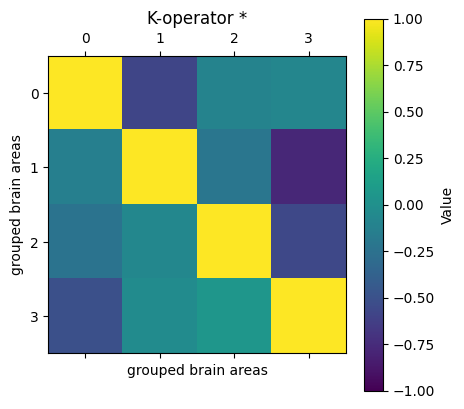

In [10]:
# plot K obtained with matrix multiplication row by column and element-wise with an heatmap 

# fig, axes = plt.subplots(1, 2, figsize=(15, 7))
# palette = "viridis"

# # plot the first heatmap
# sns.heatmap(K_matmul, cmap=palette, ax=axes[0])
# axes[0].set_title('K with Matrix Multiplication (Row by Column)')
# axes[0].set_xlabel("grouped brain areas")
# axes[0].set_ylabel("grouped brain areas")

# # plot the second heatmap
# sns.heatmap(K_elementw, cmap=palette, ax=axes[1])
# axes[1].set_title('K with Element-wise Multiplication')
# axes[1].set_xlabel("grouped brain areas")
# axes[1].set_ylabel("grouped brain areas")

# plt.tight_layout()
# plt.savefig(os.path.join(output_dir, f"{"K_heatmap_comparison"}.png"))
# plt.show()

plt.figure(figsize=(20, 15))
cax = plt.matshow(K_matmul, cmap='viridis', vmin=-1, vmax=1)
plt.colorbar(cax, label='Value')
plt.title('K-operator @')
plt.xlabel('grouped brain areas')
plt.ylabel('grouped brain areas')
plt.savefig('K@_test1_Sofia.pdf')
plt.show()

plt.figure(figsize=(20, 15))
cax = plt.matshow(K_elementw, cmap='viridis', vmin=-1, vmax=1)
plt.colorbar(cax, label='Value')
plt.title('K-operator *')
plt.xlabel('grouped brain areas')
plt.ylabel('grouped brain areas')
plt.savefig('K_test1_Sofia.pdf')
plt.show()


/Users/sofiafazio/Università/Tesi/section_4_try3/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/sofiafazio/Università/Tesi/section_4_try3/.venv/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/Users/sofiafazio/Università/Tesi/section_4_try3/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/sofiafazio/Università/Tesi/section_4_try3/.venv/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


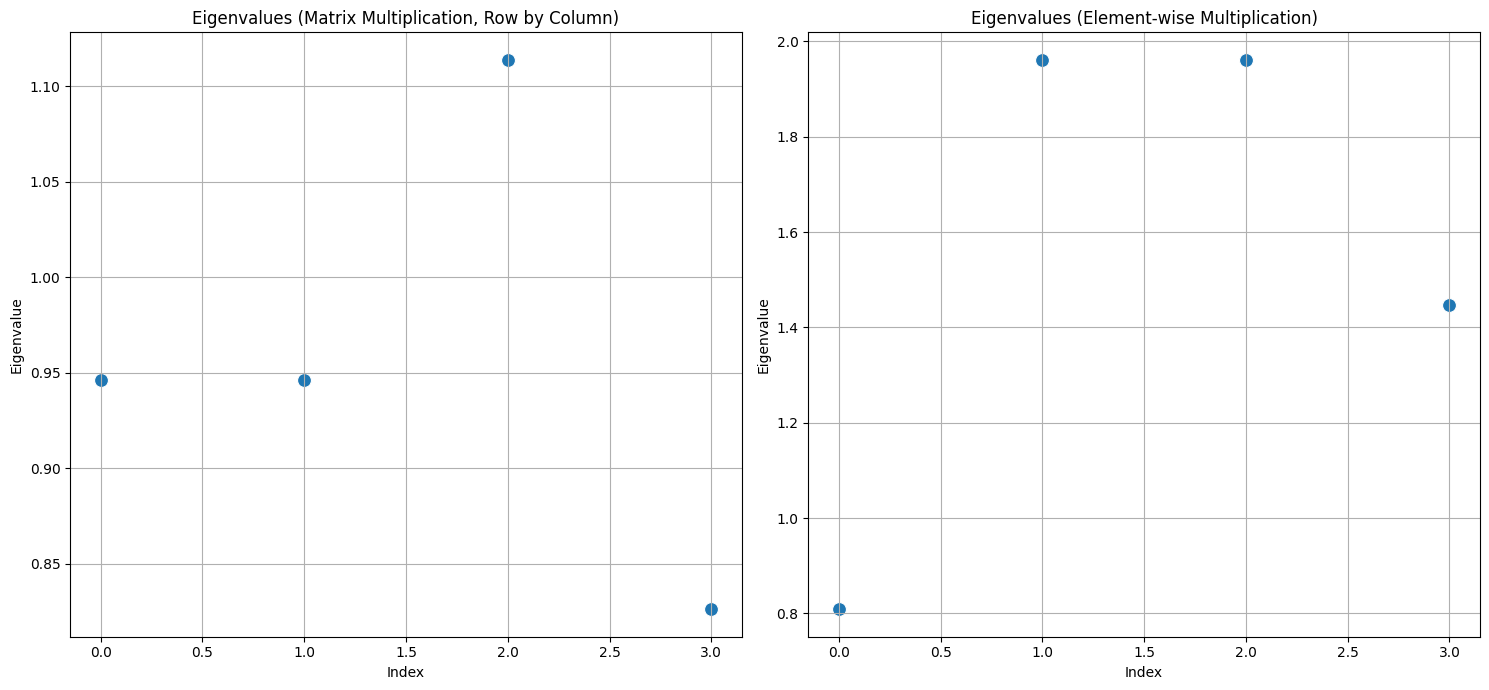

In [26]:
# plot with a scatterplot the eigenvalues of the two K obtained with the two different multiplication methods, on
# the y axis we have the eigenvalues and on the x axis we have their index
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
# plot the eigenvalues for matrix multiplication (row by column)
sns.scatterplot(x=np.arange(len(eigenval_K_matmul)), y=eigenval_K_matmul, ax=axes[0], s=100)
axes[0].set_title("Eigenvalues (Matrix Multiplication, Row by Column)")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Eigenvalue")
axes[0].grid(True)

# plot the eigenvalues for element-wise multiplication
sns.scatterplot(
    x=np.arange(len(eigenval_K_elementw)), y=eigenval_K_elementw, ax=axes[1], s=100
)
axes[1].set_title("Eigenvalues (Element-wise Multiplication)")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Eigenvalue")
axes[1].grid(True)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{"K_eigenval_comparison"}.png"))
plt.show()